# Dog vs Cat Image Classification Using Deep Learning and Transfer Learning

#### In this project, I developed an end to end deep learning model to classify images of dogs and cats. I started by downloading the dogs vs cats dataset from kaggle, extracting and exploring the dataset, and selecting 1,000 cat images and 1,000 dog images to balance the classes. I resized all images to 224 by 224 pixels, labeled them appropriately (cats = 0, dogs = 1), and converted the images into numpy arrays. I then split the dataset into training and testing sets and normalized the pixel values to scale between 0 and 1. Using tensorflow and tensorflow hub, I built a neural network by leveraging the pre-trained MobileNetV2 model as a feature extractor, followed by a Dense layer for binary classification. After compiling the model with the Adam optimizer and Sparse Categorical Crossentropy loss function, I trained it for 10 epochs, achieving a test accuracy of 98.25%. Finally, I built a prediction system that allows users to input any new image, processes the image, and predicts whether it represents a cat or a dog, successfully validating it with external images downloaded from Google.

In [1]:
!pip install kaggle

In [41]:
import os
import shutil

# Make the kaggle folder if it doesn't exist
os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)

# Move your uploaded kaggle.json to the correct location
shutil.move("kaggle.json", os.path.expanduser("~/.kaggle/kaggle.json"))

# Set permissions
os.chmod(os.path.expanduser("~/.kaggle/kaggle.json"), 600)

#### importing the dog vs cat dataset from kaggle

In [44]:
# kaggle api
!kaggle competitions download -c dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [45]:
#extracting the compressed file
from zipfile import ZipFile
dataset = "dogs-vs-cats.zip"
with ZipFile(dataset, 'r') as zip:
    zip.extractall()
    print('The dataset is extracted')   #this gives me the sample submission.csv

The dataset is extracted


In [46]:
from zipfile import ZipFile
dataset = "train.zip"
with ZipFile(dataset, 'r') as zip:
    zip.extractall()
    print('The dataset is extracted') 

The dataset is extracted


In [47]:
import os
#counting the number of files in train folder
path, dirs, files = next(os.walk('train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


In [48]:
import os
print(os.getcwd())

C:\Users\hp\Downloads


In [49]:
##Printing the names of images
file_names = os.listdir('train')
print(file_names)

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg', 'cat.10000.jpg', 'cat.10001.jpg', 'cat.10002.jpg', 'cat.10003.jpg', 'cat.10004.jpg', 'cat.10005.jpg', 'cat.10006.jpg', 'cat.10007.jpg', 'cat.10008.jpg', 'cat.10009.jpg', 'cat.1001.jpg', 'cat.10010.jpg', 'cat.10011.jpg', 'cat.10012.jpg', 'cat.10013.jpg', 'cat.10014.jpg', 'cat.10015.jpg', 'cat.10016.jpg', 'cat.10017.jpg', 'cat.10018.jpg', 'cat.10019.jpg', 'cat.1002.jpg', 'cat.10020.jpg', 'cat.10021.jpg', 'cat.10022.jpg', 'cat.10023.jpg', 'cat.10024.jpg', 'cat.10025.jpg', 'cat.10026.jpg', 'cat.10027.jpg', 'cat.10028.jpg', 'cat.10029.jpg', 'cat.1003.jpg', 'cat.10030.jpg', 'cat.10031.jpg', 'cat.10032.jpg', 'cat.10033.jpg', 'cat.10034.jpg', 'cat.10035.jpg', 'cat.10036.jpg', 'cat.10037.jpg', 'cat.10038.jpg', 'cat.10039.jpg', 'cat.1004.jpg', 'cat.10040.jpg', 'cat.10041.jpg', 'cat.10042.jpg', 'cat.10043.jpg', 'cat.10044.jpg', 'cat.10045.jpg', 'cat.10046.jpg', 'cat.10047.jpg', 'cat.10048.jpg', 'cat.10049.jpg', 'cat.1005.jpg'

In [50]:
#importing the libraries we need 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from PIL import Image
import cv2

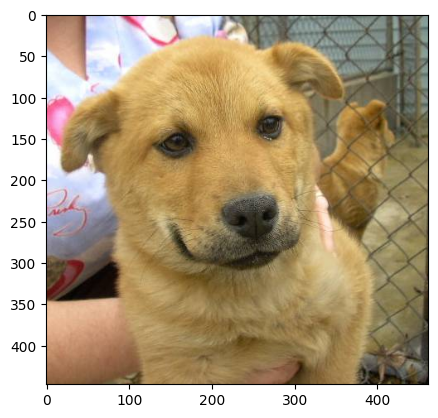

In [51]:
#displaying the images of dogs and cats
#dog images
img = mpimg.imread("train\dog.10816.jpg")
plt.imshow(img)

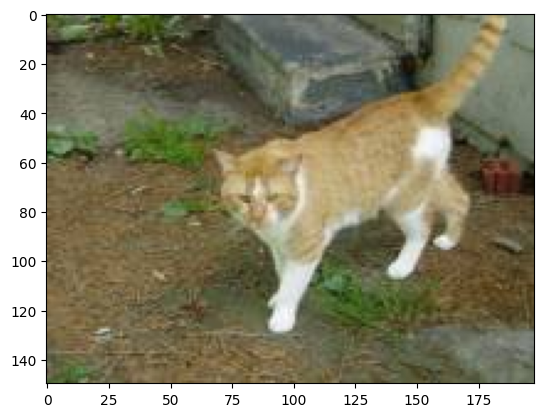

In [52]:
#cat images
img = mpimg.imread("train\cat.10628.jpg")
plt.imshow(img)

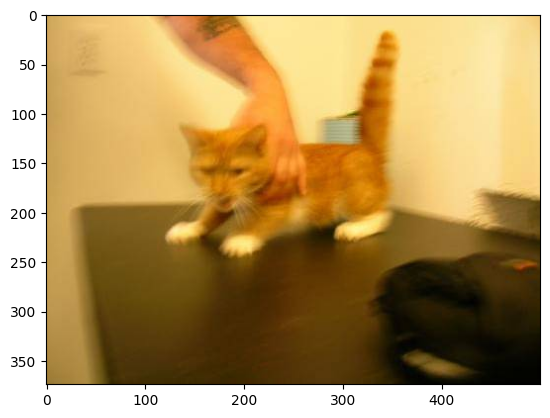

In [53]:
#cat images
img = mpimg.imread("train\cat.0.jpg")
plt.imshow(img)

In [54]:
file_names = os.listdir('train')

for i in range(5):
    name = file_names[i]
    print(name[0:3])

cat
cat
cat
cat
cat


In [55]:
file_names = os.listdir('train')
dog_count = 0
cat_count = 0
for img_file in file_names:
    name = img_file[0:3]
    if name == 'dog':
        dog_count +=1
    elif name == 'cat':
        cat_count +=1
print('Number of dog image =', dog_count)
print('Number of cat image =', cat_count)

Number of dog image = 12500
Number of cat image = 12500


In [68]:
# resizing all the images
##creating a directory for resized images
os.mkdir('C:\\Users\\hp\Downloads\\image resized')

In [70]:
original_folder = 'C:\\Users\\hp\\Downloads\\train\\'
resized_folder = 'C:\\Users\\hp\\Downloads\\image resized\\'

# List all files
filenames = os.listdir(original_folder)

# Separate cats and dogs
cat_images = [f for f in filenames if f.startswith('cat')]
dog_images = [f for f in filenames if f.startswith('dog')]

# Pick 1000 cats and 1000 dogs
selected_images = cat_images[:1000] + dog_images[:1000]

# Make sure resized folder exists
os.makedirs(resized_folder, exist_ok=True)

# Resize and save images
for filename in selected_images:
    img_path = original_folder + filename
    img = Image.open(img_path)
    img = img.resize((224, 224))
    img = img.convert('RGB')

    newImgPath = resized_folder + filename
    img.save(newImgPath)

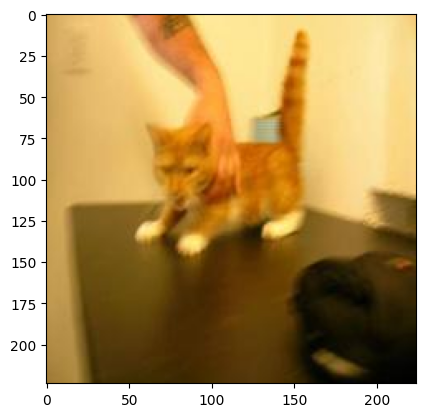

In [72]:
# display resized cat image
img = mpimg.imread("C:\\Users\\hp\Downloads\\image resized\\cat.0.jpg")
plt.imshow(img)

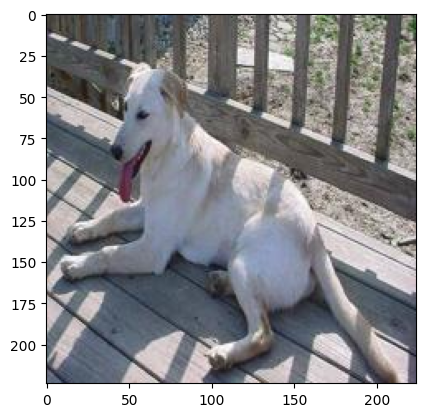

In [74]:
# display resized dog image
img = mpimg.imread("C:\\Users\\hp\Downloads\\image resized\\dog.1087.jpg")
plt.imshow(img)

### Creating labels for resized images of dogs and cats (Cats = 0 , Dogs = 1)

In [77]:
# creating a for loop to assign labels for these images
filenames = os.listdir('C:\\Users\\hp\\Downloads\\image resized\\')
labels = []
for i in range(2000):
    filename = filenames[i]
    label = filename[0:3]
    if label == 'dog':
        labels.append(1)
    else:
        labels.append(0)

In [79]:
print(labels[0:9])
print(len(labels))

[0, 0, 0, 0, 0, 0, 0, 0, 0]
2000


In [81]:
# counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[1000 1000]


#### Converting all the resized images to numpy arrays

In [84]:
import cv2
import glob

In [86]:
image_directory = 'C:\\Users\\hp\\Downloads\\image resized\\'
image_extension = ['png', 'jpg']

files = []
[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]
dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [87]:
print(dog_cat_images)

[[[[ 87 163 205]
   [ 89 165 207]
   [ 92 168 210]
   ...
   [124 203 246]
   [122 200 246]
   [122 200 246]]

  [[ 87 163 205]
   [ 89 165 207]
   [ 92 168 210]
   ...
   [124 203 246]
   [123 201 247]
   [122 200 246]]

  [[ 87 163 205]
   [ 89 165 207]
   [ 92 168 210]
   ...
   [124 204 245]
   [123 202 245]
   [123 202 245]]

  ...

  [[ 55 123 160]
   [ 55 123 160]
   [ 56 124 161]
   ...
   [  0   1   1]
   [  0   1   1]
   [  0   1   1]]

  [[ 53 121 158]
   [ 54 122 159]
   [ 55 123 160]
   ...
   [  0   1   1]
   [  0   1   1]
   [  0   1   1]]

  [[ 52 120 157]
   [ 52 120 157]
   [ 53 121 158]
   ...
   [  0   1   1]
   [  0   1   1]
   [  0   1   1]]]


 [[[ 43  43  37]
   [ 47  47  41]
   [ 47  47  41]
   ...
   [185 205 210]
   [173 197 203]
   [164 192 199]]

  [[ 42  42  36]
   [ 46  46  40]
   [ 45  45  39]
   ...
   [180 200 205]
   [169 195 201]
   [167 195 202]]

  [[ 42  42  36]
   [ 44  44  38]
   [ 43  43  37]
   ...
   [172 192 197]
   [167 193 200]
   [171 198

In [88]:
type(dog_cat_images)

numpy.ndarray

In [92]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [94]:
X = dog_cat_images
Y = np.asarray(labels)

In [96]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 2)

In [98]:
print(X.shape, x_train.shape, x_test.shape)
# 1600 training images and 400 test images

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [100]:
#before training the neural network we scale the data, so all the values will be between 0 and 1

In [102]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [103]:
print(x_train_scaled)

[[[[0.43529412 0.4627451  0.49803922]
   [0.43137255 0.45882353 0.49411765]
   [0.4627451  0.48235294 0.51764706]
   ...
   [0.97647059 0.98431373 0.98431373]
   [0.98823529 0.99215686 0.98431373]
   [0.98823529 0.99215686 0.97647059]]

  [[0.22745098 0.25490196 0.29019608]
   [0.22352941 0.25098039 0.28627451]
   [0.25490196 0.2745098  0.30980392]
   ...
   [0.98039216 0.98823529 0.98823529]
   [0.99215686 0.99607843 0.98823529]
   [0.99215686 0.99607843 0.98039216]]

  [[0.21568627 0.23529412 0.27058824]
   [0.21176471 0.23137255 0.26666667]
   [0.24705882 0.25490196 0.29411765]
   ...
   [0.98431373 0.99215686 0.99215686]
   [0.99607843 1.         0.99215686]
   [1.         1.         0.98823529]]

  ...

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.99607843 0.99607843 0.99607843]
   [1.         0.99607843 1.        ]
   [1.         0.99607843 1.        ]]

  [[0.99215686 0.99215686 0.99215686]
   [0.9

In [106]:
print(x_test_scaled)

[[[[0.68235294 0.83137255 0.83137255]
   [0.68235294 0.83137255 0.83137255]
   [0.69411765 0.83529412 0.83529412]
   ...
   [0.9254902  0.93333333 0.93333333]
   [0.9254902  0.93333333 0.93333333]
   [0.9254902  0.93333333 0.93333333]]

  [[0.68235294 0.83137255 0.83137255]
   [0.68235294 0.83137255 0.83137255]
   [0.69411765 0.83529412 0.83529412]
   ...
   [0.9254902  0.93333333 0.93333333]
   [0.9254902  0.93333333 0.93333333]
   [0.9254902  0.93333333 0.93333333]]

  [[0.69019608 0.83137255 0.83137255]
   [0.69019608 0.83137255 0.83137255]
   [0.70196078 0.83529412 0.83529412]
   ...
   [0.9254902  0.93333333 0.93333333]
   [0.9254902  0.93333333 0.93333333]
   [0.9254902  0.93333333 0.93333333]]

  ...

  [[0.95686275 0.97647059 0.96862745]
   [0.96078431 0.98039216 0.97254902]
   [0.96078431 0.98039216 0.97254902]
   ...
   [1.         0.99215686 1.        ]
   [1.         0.99215686 1.        ]
   [1.         0.99215686 1.        ]]

  [[0.90196078 0.92941176 0.91764706]
   [0.9

#### Building the Neural Network

In [109]:
import tensorflow as tf
import tensorflow_hub as hub

In [110]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'
#mobilenet_model = 'https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/5'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [113]:
num_of_classes = 2
model = tf.keras.Sequential([    
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [115]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [119]:
model.fit(x_train_scaled, y_train, epochs=10)

Epoch 1/10



50/50 [==============================] - 12s 177ms/step - loss: 0.2303 - acc: 0.8963
Epoch 2/10
50/50 [==============================] - 9s 173ms/step - loss: 0.0747 - acc: 0.9762
Epoch 3/10
50/50 [==============================] - 8s 162ms/step - loss: 0.0545 - acc: 0.9850
Epoch 4/10
50/50 [==============================] - 8s 163ms/step - loss: 0.0417 - acc: 0.9912
Epoch 5/10
50/50 [==============================] - 8s 159ms/step - loss: 0.0336 - acc: 0.9937
Epoch 6/10
50/50 [==============================] - 8s 162ms/step - loss: 0.0267 - acc: 0.9969
Epoch 7/10
50/50 [==============================] - 8s 163ms/step - loss: 0.0219 - acc: 0.9981
Epoch 8/10
50/50 [==============================] - 8s 164ms/step - loss: 0.0201 - acc: 0.9981
Epoch 9/10
50/50 [==============================] - 8s 159ms/step - loss: 0.0174 - acc: 0.9981
Epoch 10/10
50/50 [==============================] - 8s 167ms/step - loss: 0.0154 - acc: 0.9987


In [121]:
score, acc = model.evaluate(x_test_scaled, y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 3s 167ms/step - loss: 0.0695 - acc: 0.9825
Test Loss = 0.0695272833108902
Test Accuracy = 0.9825000166893005


In [130]:
import cv2

#### Build a Predictive System

Path of the image to be predicted:  C:\Users\hp\Downloads\random dog image from google.jpg


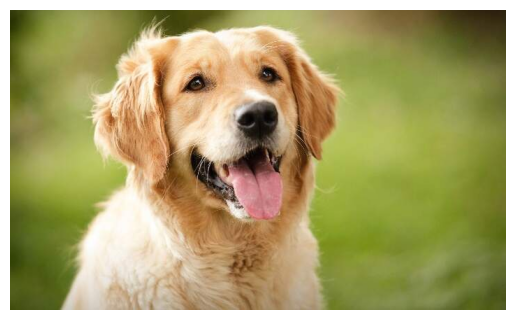

1/1 [==============================] - 0s 35ms/step
The image represents a Dog


In [143]:
input_img_path = input('Path of the image to be predicted: ')
input_image = cv2.imread(input_img_path)

plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

input_image_resize = cv2.resize(input_image, (224,224))
input_image_scaled = input_image_resize/255
image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])
input_prediction = model.predict(image_reshaped)
input_pred_label = np.argmax(input_prediction)

if input_pred_label == 0:
    print('The image represents a Cat')
else:
    print('The image represents a Dog')

Path of the image to be predicted:  C:\Users\hp\Downloads\random cat image from google.jpg


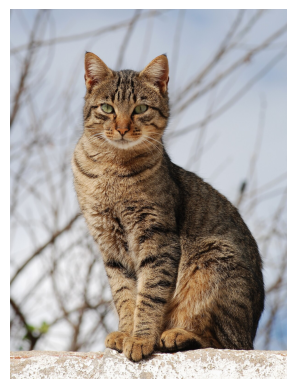

1/1 [==============================] - 0s 34ms/step
The image represents a Cat


In [145]:
input_img_path = input('Path of the image to be predicted: ')
input_image = cv2.imread(input_img_path)

plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

input_image_resize = cv2.resize(input_image, (224,224))
input_image_scaled = input_image_resize/255
image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])
input_prediction = model.predict(image_reshaped)
input_pred_label = np.argmax(input_prediction)

if input_pred_label == 0:
    print('The image represents a Cat')
else:
    print('The image represents a Dog')

In [147]:
def predict_image(model, img_path):
    """
    Predicts whether the image is a Cat or Dog.

    Args:
        model: Trained TensorFlow model
        img_path: Path to the image file

    Returns:
        None
    """
    # Read the image
    input_image = cv2.imread(img_path)

    if input_image is None:
        print("Error: Image not found at the specified path!")
        return
    

    plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    # Preprocess the image
    input_image_resize = cv2.resize(input_image, (224,224))
    input_image_scaled = input_image_resize / 255
    input_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

    # Make prediction
    input_prediction = model.predict(input_reshaped)
    input_pred_label = np.argmax(input_prediction)

    # this if statement output the prediction
    if input_pred_label == 0:
        print('The image represents a Cat')
    else:
        print('The image represents a Dog')

Path of the image to be predicted:  C:\Users\hp\Downloads\random dog 2 image from google.jpeg


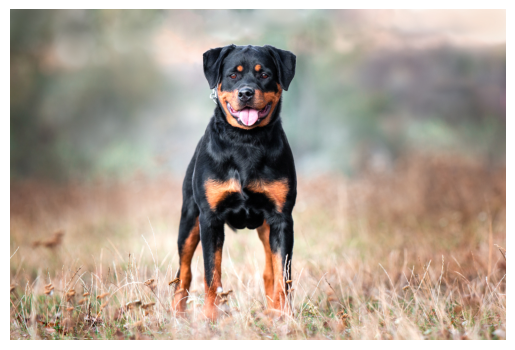

1/1 [==============================] - 0s 35ms/step
The image represents a Dog


In [151]:
img_path = input('Path of the image to be predicted: ')
predict_image(model, img_path)

Path of the image to be predicted:  C:\Users\hp\Downloads\random cat 2 image from google.jpg


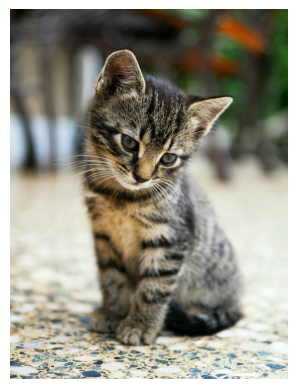

1/1 [==============================] - 0s 33ms/step
The image represents a Cat


In [153]:
img_path = input('Path of the image to be predicted: ')
predict_image(model, img_path)